# Predicting Suitable Solar Energy Potential in Buildings of Karachi
#### Solar installation stakeholders face significant challenges in assessing building potential, often requiring costly and time-consuming site surveys. This project addresses this challenge by analyzing the annual solar energy potential for Karachi's buildings using features from the data set.

## Business Value

#### Reduce assessment costs by quickly screening buildings for solar potential.
#### 	Support urban planning and renewable energy initiative
#### Help property owners evaluate solar investment opportunities.
#### Enable scalable solar adoption strategies across Karachi.i


# Business Questions

- How can the surface area of rooftops be optimized for maximizing the potential installable area for solar panels in Karachi?
- How does the energy potential per year vary across different assumed building types?
- What is the relationship between estimated building height and energy potential per year for optimizing solar panel placement?
- How can businesses leverage the estimated capacity factor to predict the efficiency and performance of solar installations?
- How does the estimated tilt of rooftops affect the energy potential per year and what adjustments can maximize efficiency?


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report, accuracy_score, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor,plot_tree

df=pd.read_csv("karachi_rooftop_solar_potential.csv")
#To display the top 5 rows df.head(5)

df.head(5)



,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,Comment
0,1cbf6d20-5926-4fff-8817-2afb7d8b9803,Karachi,75.93,10.41,2.02,3136.49,peri-urban settlement,5.0,14.76,1553.0,NaN,NaN
1,ed9e4c08-8c4e-425f-89d5-2d7ed8149fc2,Karachi,73.05,6.07,1.18,1827.58,peri-urban settlement,5.0,21.47,1553.0,NaN,NaN
2,4093dab6-efae-48f5-8441-7342d5756467,Karachi,77.26,27.13,5.26,8383.77,commercial,5.0,8.61,1593.0,NaN,NaN
3,c26e8c10-cf31-4bc3-a6c5-a1956b975d8e,Karachi,288.77,110.14,21.35,33533.84,multi family residential,5.0,14.02,1571.0,NaN,NaN
4,266e1e1d-4630-4e18-ac63-6a3b80e416ee,Karachi,6.65,0.00,0.00,0.00,peri-urban settlement,5.0,4.92,NaN,NaN,NaN


# Data Source
#### This dataset contains solar rooftop potential data at individual building structure levels for a sample area of interest in Karachi. The data was gathered by extracting building rooftop footprint polygons from very high-resolution satellite stereo imagery of 0.5m resolution. The rooftop angle, obstruction, and shading were taken into account during suitable area calculation


# Source (https://energydata.info)

URL:https://energydata.info/dataset/karachi-rooftop-solar-potential-mapping

In [41]:
df.dtypes


uuid                           object
City                           object
Surface_area                  float64
Potential_installable_area    float64
Peak_installable_capacity     float64
Energy_potential_per_year     float64
Assumed_building_type          object
Estimated_tilt                float64
Estimated_building_height     float64
Estimated_capacity_factor     float64
Unit_installation_price       float64
Comment                        object
dtype: object

- Surface_area: Total Surface area
- Potential_installable_area:Area in which panel can be placed
- Estimated_building_height:Height of Building
- Estimated_tilt:the angle at which panel is placed
- Assumed_building_type (encoded):Type of building
- Peak_installable_capacity:maximum capacity of kv to install  


In [42]:
print(df.count())

uuid                          296688
City                          296688
Surface_area                  296688
Potential_installable_area    296688
Peak_installable_capacity     296688
Energy_potential_per_year     296688
Assumed_building_type         296688
Estimated_tilt                296688
Estimated_building_height     295719
Estimated_capacity_factor     263704
Unit_installation_price            0
Comment                          410
dtype: int64


In [43]:
## city is duplicate for all
df2 = df.pivot_table(index = ['City'], aggfunc ='size')
print("Get count of duplicate values in  columns:\n", df2)

Get count of duplicate values in  columns:
 City
Karachi    296688
dtype: int64


In [5]:
df=df.drop(['Comment', 'uuid','Unit_installation_price','City'], axis=1)
df.head(5)

,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor
0,75.93,10.41,2.02,3136.49,peri-urban settlement,5.0,14.76,1553.0
1,73.05,6.07,1.18,1827.58,peri-urban settlement,5.0,21.47,1553.0
2,77.26,27.13,5.26,8383.77,commercial,5.0,8.61,1593.0
3,288.77,110.14,21.35,33533.84,multi family residential,5.0,14.02,1571.0
4,6.65,0.00,0.00,0.00,peri-urban settlement,5.0,4.92,NaN


In [6]:



duplicate_rows_df = df [df.duplicated()]

print("number of duplicate rows:", duplicate_rows_df.size)



number of duplicate rows: 4408


In [7]:
print(df.isnull().sum())


Surface_area                      0
Potential_installable_area        0
Peak_installable_capacity         0
Energy_potential_per_year         0
Assumed_building_type             0
Estimated_tilt                    0
Estimated_building_height       969
Estimated_capacity_factor     32984
dtype: int64


In [8]:
df['Estimated_building_height'] = df['Estimated_building_height'].fillna(df.groupby('Assumed_building_type')['Estimated_building_height'].transform('mean'))
#Median
df['Estimated_capacity_factor'] = df['Estimated_capacity_factor'].fillna(df.groupby('Assumed_building_type')['Estimated_capacity_factor'].transform('mean'))

In [9]:
print(df.isnull().sum())

Surface_area                  0
Potential_installable_area    0
Peak_installable_capacity     0
Energy_potential_per_year     0
Assumed_building_type         0
Estimated_tilt                0
Estimated_building_height     0
Estimated_capacity_factor     0
dtype: int64


Text(0.5, 0, 'Assumed_building_type')

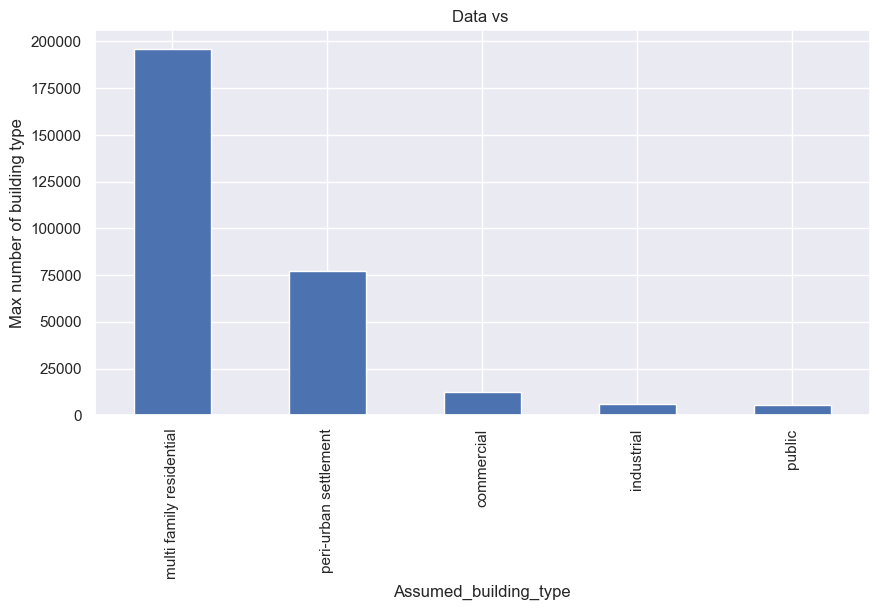

In [10]:
df.Assumed_building_type.value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Data vs ")
plt.ylabel('Max number of building type')
plt.xlabel('Assumed_building_type')

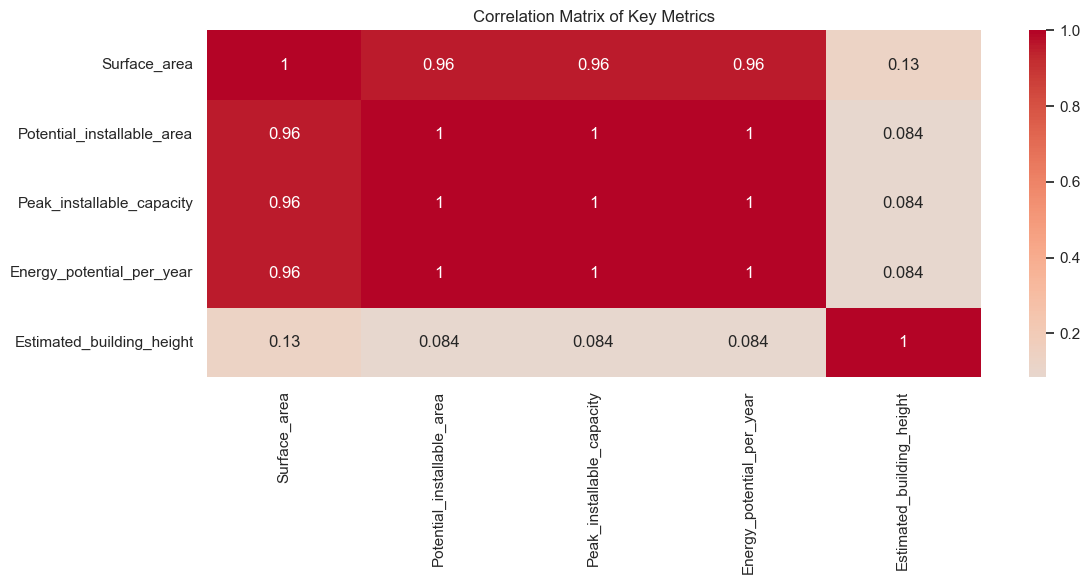

In [11]:
numeric_cols = ['Surface_area', 'Potential_installable_area', 'Peak_installable_capacity',
                'Energy_potential_per_year', 'Estimated_building_height']
correlation = df[numeric_cols].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Metrics')
plt.tight_layout()

#high colarted


Text(0, 0.5, 'Energy Potential per Year')

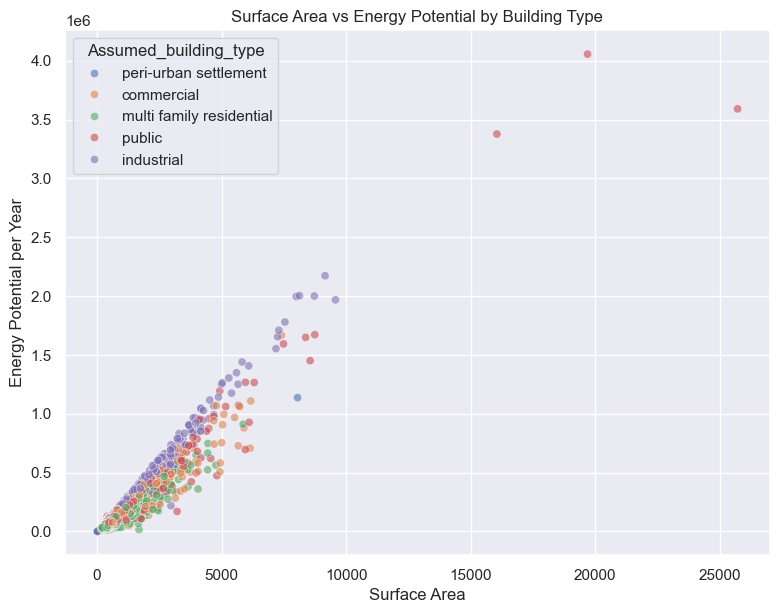

In [12]:
plt.figure(figsize=(20, 15))

# 1. Surface Area vs Energy Potential Scatter Plot
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Surface_area', y='Energy_potential_per_year',
                hue='Assumed_building_type', alpha=0.6)
plt.title('Surface Area vs Energy Potential by Building Type')
plt.xlabel('Surface Area')
plt.ylabel('Energy Potential per Year')

## they are co related

Text(0, 0.5, 'Estimated Height')

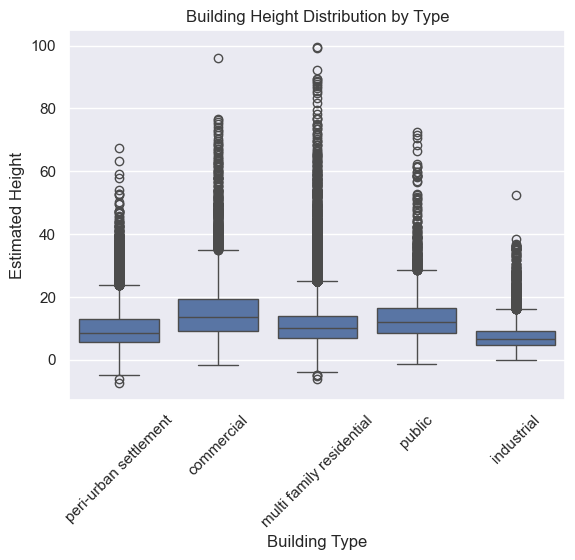

In [13]:
# 2. Building Height Distribution
plt.subplot(1, 1,1)
sns.boxplot(data=df, x='Assumed_building_type', y='Estimated_building_height')
plt.xticks(rotation=45)
plt.title('Building Height Distribution by Type')
plt.xlabel('Building Type')
plt.ylabel('Estimated Height')

- Commercial buildings appear to have the highest median height
- Industrial buildings show the smallest variation in height (smallest box and whiskers)
- All building types have numerous outliers (dots) showing much taller buildings than typical
- Most buildings across all types are relatively low-rise (as boxes mostly are below 20 height)
- Multi family buildings have most outliers above 100 height

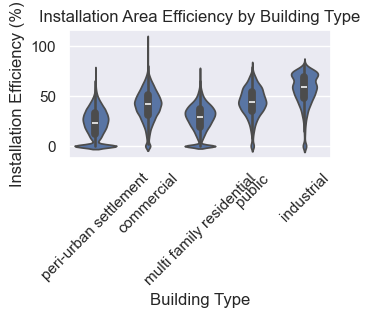

In [15]:
# 4. Installation Area Efficiency
df['Installation_efficiency'] = (df['Potential_installable_area'] / df['Surface_area']) * 100
plt.subplot(2, 2, 4)
sns.violinplot(data=df, x='Assumed_building_type', y='Installation_efficiency')
plt.xticks(rotation=45)
plt.title('Installation Area Efficiency by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Installation Efficiency (%)')
plt.tight_layout()

In [16]:

groupeddf=df.groupby('Assumed_building_type')
 # Calculate efficiency score


In [17]:
for key, count in groupeddf:
    print(key+" : " + str(len(count['Assumed_building_type'])))


commercial : 12557
industrial : 5763
multi family residential : 196225
peri-urban settlement : 76923
public : 5220


In [18]:
print("Avg Space Utilized")
for key, avg_space_utilization in groupeddf:
  space=(avg_space_utilization['Potential_installable_area'].sum() / df['Surface_area'].sum() * 100)
  print("for " + key + ":" + str(space) + "%")


Avg Space Utilized
for commercial:4.833032247570655%
for industrial:4.566732449707831%
for multi family residential:24.356086114039016%
for peri-urban settlement:3.0493120990412605%
for public:2.9353123960958616%


In [19]:
#'buildings_with_zero_potential': ,
print("buildings with zero potential")
for key, buildings_with_zero_potential in groupeddf:
  zero=len(buildings_with_zero_potential[buildings_with_zero_potential['Energy_potential_per_year'] == 0])
  print("in " + key + ":" + str(zero))



buildings with zero potential
in commercial:360
in industrial:146
in multi family residential:19367
in peri-urban settlement:13007
in public:104


In [20]:
#'buildings_with_high_potential': len(dfcopy[dfcopy['Energy_potential_per_year'] > dfcopy['Energy_potential_per_year'].mean()])

print("buildings with high potential")
for key, buildings_with_high_potential in groupeddf:
  high=len(buildings_with_high_potential[buildings_with_high_potential['Energy_potential_per_year'] > buildings_with_high_potential['Energy_potential_per_year'].mean()])
  print(key + ":" + str(high))




buildings with high potential
commercial:3658
industrial:1697
multi family residential:60183
peri-urban settlement:26482
public:1515


In [21]:
pivot_table = pd.pivot_table(
    df,
    values=[
        'Surface_area',
        'Potential_installable_area',
        'Peak_installable_capacity',
        'Energy_potential_per_year',
        'Estimated_building_height',
        'Estimated_capacity_factor',
        'Estimated_tilt',
    ],
    index=['Assumed_building_type'],  # Replace with your actual grouping column name
    aggfunc='mean'
)

display(pivot_table)

,Energy_potential_per_year,Estimated_building_height,Estimated_capacity_factor,Estimated_tilt,Peak_installable_capacity,Potential_installable_area,Surface_area
Assumed_building_type,,,,,,,
commercial,46913.500054,15.075818,1580.617080,5.182241,29.661224,152.892228,317.812733
industrial,96782.299502,7.826765,1583.807456,5.080448,61.052959,314.781036,471.031034
multi family residential,15126.229129,10.894884,1577.177799,4.981379,9.565623,49.306568,135.049155
peri-urban settlement,4826.871642,9.800880,1578.857401,4.711712,3.054904,15.746980,55.560035
public,68303.998138,13.195120,1575.062177,5.436724,43.334640,223.375448,430.016094


In [22]:

def analyze_surface_area_optimization():
    """Analyze surface area utilization and optimization potential"""
    # Calculate utilization ratio
    df['utilization_ratio'] = df['Potential_installable_area'] / df['Surface_area'] * 100

    # Group by building type and calculate mean metrics
    utilization_analysis = df.groupby('Assumed_building_type').agg({
        'Surface_area': 'mean',
        'Potential_installable_area': 'mean',
        'utilization_ratio': 'mean'
    }).round(2)

    
    return utilization_analysis






# Print results with insights


In [23]:
print(" Surface Area Optimization Analysis:")
display( analyze_surface_area_optimization())


 Surface Area Optimization Analysis:


,Surface_area,Potential_installable_area,utilization_ratio
Assumed_building_type,,,
commercial,317.81,152.89,40.32
industrial,471.03,314.78,55.98
multi family residential,135.05,49.31,27.45
peri-urban settlement,55.56,15.75,22.35
public,430.02,223.38,43.70


In [24]:
features = ['Surface_area', 'Potential_installable_area', 'Peak_installable_capacity',
                        'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor']

X = df[features]
y = df['Energy_potential_per_year']

        # Split data
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )


In [25]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### StandardScaler operates on the principle of normalization, where it transforms the distribution of each feature to have a mean of zero and a standard deviation of one. This process ensures that all features are on the same scale, preventing any single feature from dominating the learning process due to its larger magnitude.

In [26]:


def evaluate_model(model_name, model, X_train, X_test, y_train, y_test):
    print(f"\n{'='*50}")
    print(f"{model_name} Analysis")
    print(f"{'='*50}")

    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Create bins for classification metrics
    ##Discretize variable into equal-sized buckets based on rank or based on sample quantiles.
    #For example 1000 values for 10 quantiles would produce a Categorical object indicating quantile membership for each data po
    y_test_binned = pd.qcut(y_test, q=4, labels=['Low', 'Medium', 'High', 'Very High'])
    y_pred_binned = pd.qcut(y_pred, q=4, labels=['Low', 'Medium', 'High', 'Very High'])

    # Calculate metrics
    accuracy = accuracy_score(y_test_binned, y_pred_binned)

    print("\n r2 Score:")
    print(r2_score(y_test, y_pred))
 
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test_binned, y_pred_binned))

    # Print accuracy
    print(f"\nAccuracy Score: {accuracy:.4f}")

    # Plot confusion matrix
    # Return model and predictions for further analysis
    return model, y_pred, accuracy

def analyze_linear_regression(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    return evaluate_model('Linear Regression', model, X_train, X_test, y_train, y_test)

def analyze_ridge_regression(X_train, X_test, y_train, y_test):
    model = Ridge()
    return evaluate_model('Ridge Regression', model, X_train, X_test, y_train, y_test)



def analyze_random_forest(X_train, X_test, y_train, y_test, feature_names):
    model = RandomForestRegressor(n_estimators=5, random_state=42)
    trained_model, y_pred, accuracy = evaluate_model('Random Forest', model, X_train, X_test, y_train, y_test)

    # Print feature importance
    importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': trained_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    print("\nFeature Importance:")
    display(importance)

    return trained_model, y_pred, accuracy

def analyze_gradient_boosting(X_train, X_test, y_train, y_test, feature_names):
    model = GradientBoostingRegressor(random_state=42)
    trained_model, y_pred, accuracy = evaluate_model('Gradient Boosting', model, X_train, X_test, y_train, y_test)

    # Print feature importance
    importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': trained_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    print("\nFeature Importance:")
    print(importance)

    return trained_model, y_pred, accuracy


results = {}


In [27]:

 # Run all models
results['Linear Regression'] = analyze_linear_regression(X_train, X_test, y_train, y_test)



Linear Regression Analysis

 r2 Score:
0.9997950012597184

Classification Report:
              precision    recall  f1-score   support

        High       0.98      0.98      0.98     14834
         Low       0.97      0.97      0.97     14835
      Medium       0.96      0.96      0.96     14834
   Very High       1.00      1.00      1.00     14835

    accuracy                           0.98     59338
   macro avg       0.98      0.98      0.98     59338
weighted avg       0.98      0.98      0.98     59338


Accuracy Score: 0.9775


In [28]:
results['Linear Regression Scalled'] = analyze_linear_regression(X_train_scaled, X_test_scaled, y_train, y_test)



Linear Regression Analysis

 r2 Score:
0.9997950012597184

Classification Report:
              precision    recall  f1-score   support

        High       0.98      0.98      0.98     14834
         Low       0.97      0.97      0.97     14835
      Medium       0.96      0.96      0.96     14834
   Very High       1.00      1.00      1.00     14835

    accuracy                           0.98     59338
   macro avg       0.98      0.98      0.98     59338
weighted avg       0.98      0.98      0.98     59338


Accuracy Score: 0.9775


In [29]:
results['Ridge Regression'] = analyze_ridge_regression(X_train, X_test, y_train, y_test)




Ridge Regression Analysis

 r2 Score:
0.9997950021832273

Classification Report:
              precision    recall  f1-score   support

        High       0.98      0.98      0.98     14834
         Low       0.97      0.97      0.97     14835
      Medium       0.96      0.96      0.96     14834
   Very High       1.00      1.00      1.00     14835

    accuracy                           0.98     59338
   macro avg       0.98      0.98      0.98     59338
weighted avg       0.98      0.98      0.98     59338


Accuracy Score: 0.9775


In [30]:
results['Ridge Regression Scalled'] = analyze_ridge_regression(X_train_scaled, X_test_scaled, y_train, y_test)



Ridge Regression Analysis

 r2 Score:
0.999795452286864

Classification Report:
              precision    recall  f1-score   support

        High       0.98      0.98      0.98     14834
         Low       0.97      0.97      0.97     14835
      Medium       0.96      0.96      0.96     14834
   Very High       1.00      1.00      1.00     14835

    accuracy                           0.98     59338
   macro avg       0.98      0.98      0.98     59338
weighted avg       0.98      0.98      0.98     59338


Accuracy Score: 0.9776


In [31]:
results['Random Forest'] = analyze_random_forest(X_train, X_test, y_train, y_test, features)




Random Forest Analysis

 r2 Score:
0.9858832016668982

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00     14834
         Low       1.00      1.00      1.00     14835
      Medium       1.00      1.00      1.00     14834
   Very High       1.00      1.00      1.00     14835

    accuracy                           1.00     59338
   macro avg       1.00      1.00      1.00     59338
weighted avg       1.00      1.00      1.00     59338


Accuracy Score: 0.9995

Feature Importance:
                      Feature  Importance
2   Peak_installable_capacity    0.593248
1  Potential_installable_area    0.400660
0                Surface_area    0.004178
4   Estimated_building_height    0.001623
5   Estimated_capacity_factor    0.000188
3              Estimated_tilt    0.000104


In [32]:
results['Random Forest Scalled'] = analyze_random_forest(X_train_scaled, X_test_scaled, y_train, y_test, features)



Random Forest Analysis

 r2 Score:
0.9858831948468643

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00     14834
         Low       1.00      1.00      1.00     14835
      Medium       1.00      1.00      1.00     14834
   Very High       1.00      1.00      1.00     14835

    accuracy                           1.00     59338
   macro avg       1.00      1.00      1.00     59338
weighted avg       1.00      1.00      1.00     59338


Accuracy Score: 0.9995

Feature Importance:
                      Feature  Importance
2   Peak_installable_capacity    0.593248
1  Potential_installable_area    0.400660
0                Surface_area    0.004178
4   Estimated_building_height    0.001623
5   Estimated_capacity_factor    0.000188
3              Estimated_tilt    0.000104


In [33]:
results['Gradient Boosting'] = analyze_gradient_boosting(X_train, X_test, y_train, y_test, features)





Gradient Boosting Analysis

 r2 Score:
0.9961354770841037

Classification Report:
              precision    recall  f1-score   support

        High       0.98      0.97      0.97     14834
         Low       0.98      0.99      0.99     14835
      Medium       0.97      0.97      0.97     14834
   Very High       0.99      0.99      0.99     14835

    accuracy                           0.98     59338
   macro avg       0.98      0.98      0.98     59338
weighted avg       0.98      0.98      0.98     59338


Accuracy Score: 0.9798

Feature Importance:
                      Feature  Importance
2   Peak_installable_capacity    0.611015
1  Potential_installable_area    0.383824
0                Surface_area    0.004870
5   Estimated_capacity_factor    0.000176
4   Estimated_building_height    0.000080
3              Estimated_tilt    0.000035


In [34]:
results['Gradient Boosting Scalled'] = analyze_gradient_boosting(X_train_scaled, X_test_scaled, y_train, y_test, features)


Gradient Boosting Analysis

 r2 Score:
0.9961353279266657

Classification Report:
              precision    recall  f1-score   support

        High       0.98      0.97      0.97     14834
         Low       0.98      0.99      0.99     14835
      Medium       0.97      0.97      0.97     14834
   Very High       0.99      0.99      0.99     14835

    accuracy                           0.98     59338
   macro avg       0.98      0.98      0.98     59338
weighted avg       0.98      0.98      0.98     59338


Accuracy Score: 0.9798

Feature Importance:
                      Feature  Importance
2   Peak_installable_capacity    0.611015
1  Potential_installable_area    0.383824
0                Surface_area    0.004870
5   Estimated_capacity_factor    0.000176
4   Estimated_building_height    0.000080
3              Estimated_tilt    0.000035


In [35]:

accuracies = pd.DataFrame({
     'Model': results.keys(),
     'Accuracy': [result[2] for result in results.values()]
 }).sort_values('Accuracy', ascending=False)

print("\nModel Accuracy Comparison:")
print("=========================")
display(accuracies)



Model Accuracy Comparison:


,Model,Accuracy
4,Random Forest,0.999528
5,Random Forest Scalled,0.999528
6,Gradient Boosting,0.979827
7,Gradient Boosting Scalled,0.979827
3,Ridge Regression Scalled,0.977552
0,Linear Regression,0.977519
1,Linear Regression Scalled,0.977519
2,Ridge Regression,0.977519



Decision Tree Performance Metrics:
R2 Score: 0.9113

Feature Importance:
                      Feature  Importance
2   Peak_installable_capacity      0.9147
1  Potential_installable_area      0.0853
0                Surface_area      0.0000
3              Estimated_tilt      0.0000
4   Estimated_building_height      0.0000
5   Estimated_capacity_factor      0.0000


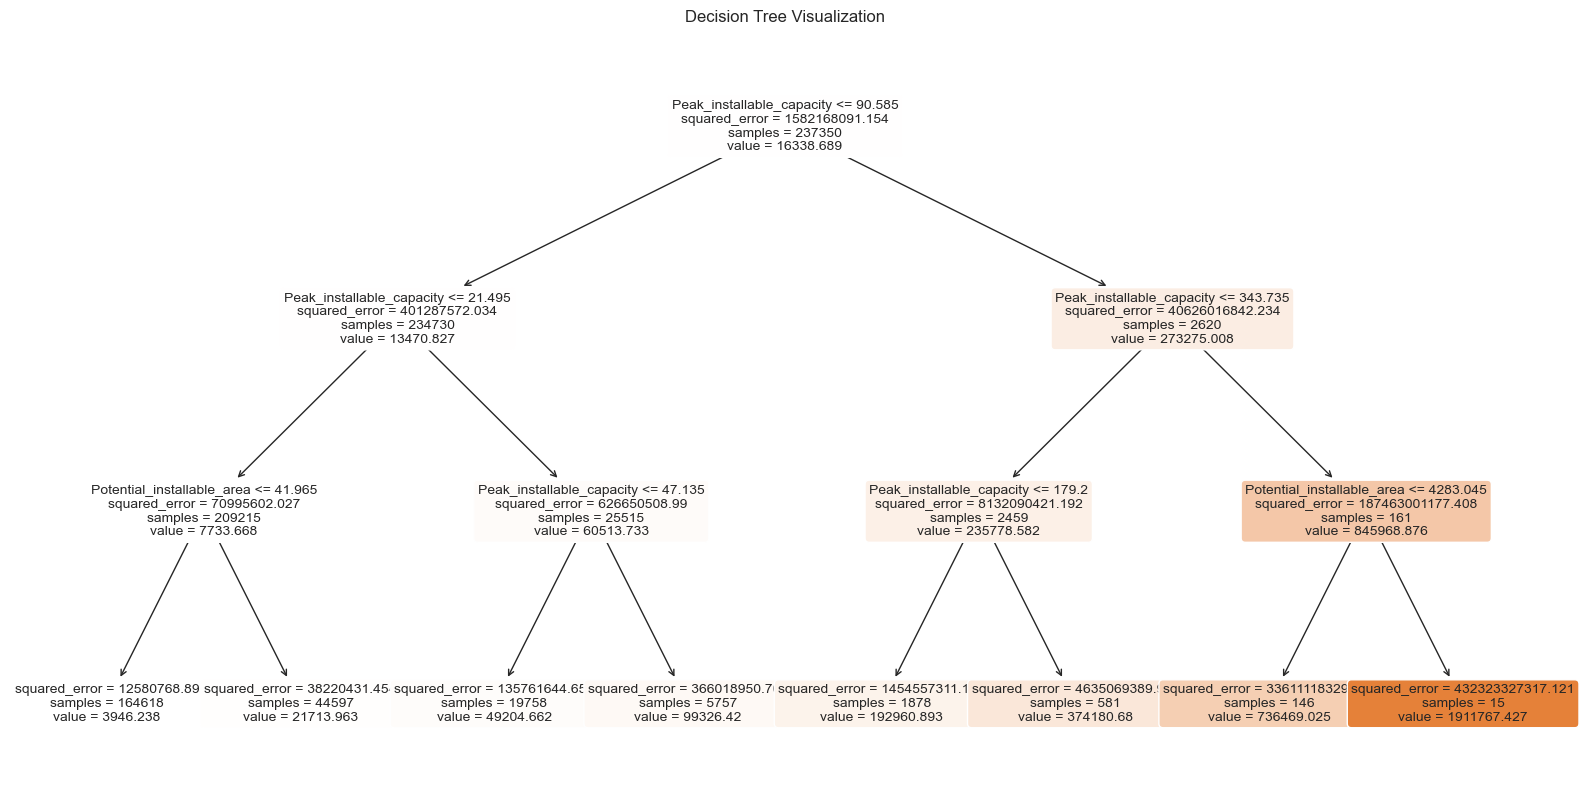

In [36]:


# Function to train decision tree and get performance metrics
def train_and_evaluate_decision_tree():  # Reduced max_depth for better visualization

    dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)
    dt_model.fit(X_train, y_train)

    # Make predictions
    y_pred = dt_model.predict(X_test)

    # Calculate performance metrics
    metrics = {
        'R2 Score': r2_score(y_test, y_pred),
        
    }

    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': dt_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    return metrics, feature_importance,dt_model

# Function to visualize decision tree
def visualize_tree(model, feature_names):
    plt.figure(figsize=(20,10))
    plot_tree(model,
             feature_names=feature_names,
             filled=True,
             rounded=True,
             fontsize=10)
    plt.title("Decision Tree Visualization")
    plt.show();

# Load and prepare the data

# Train model and get metrics
metrics, feature_importance,dTmodel = train_and_evaluate_decision_tree()

# Print results
print("\nDecision Tree Performance Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nFeature Importance:")
print(feature_importance)

# Visualize the tree
visualize_tree(dTmodel, features)

# Future Inhansements

- run random froest with diffent estimators
- make range of peak install capicty as per business knowleged and run d tree
- use other scalling menthod then standerd scaller
- reduce featues and run for dession tree
- use other ML an DL models for better comparison
- Have beyyer business understanding